Instalando o pacote pycaret

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install pycaret[full]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.0.0'

Importando um banco de dados para testar se o pycaret foi corretamente instalado

In [ ]:
### loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('airline')

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

Plotar a série temporal com os dados já importados

<Axes: xlabel='Period'>

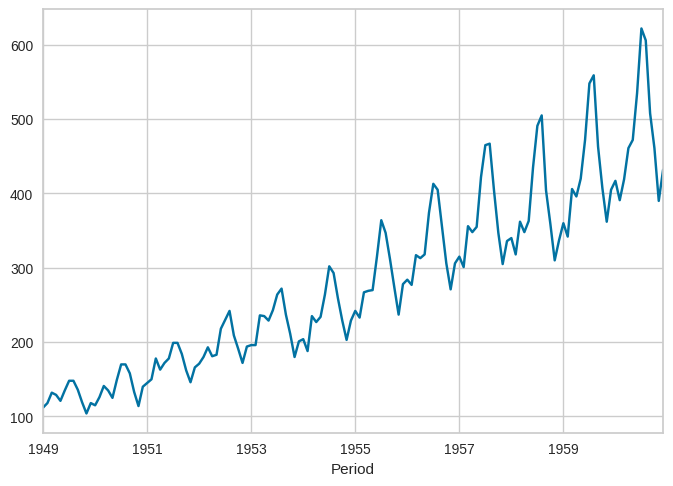

In [ ]:
# plot the dataset
data.plot()

Importar funcionalidades do pacote para trabalhar com Séries Temporais



In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *

Instalar demais pacotes relevantes

In [ ]:
# Habilite o pandas
import pandas as pd

# Habilite o seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#!pip install yfinance
#import yfinance as yf

# Habilite o matplotlib 3.1.3
# Lembre que aqui é preciso concordar com a instalação desta versão (coloca y quando colab perguntar se você concorda com a instalação)
#!pip uninstall matplotlib
#!pip install matplotlib==3.1.3

Importando dados do seu computador

Convertendo os dados em informações de datas

E colocando a data como um rótulo

In [ ]:
# Carregar os dados petro
# Lembre que é necessário inserir os dados no ambiente do colab previamente
dt = pd.read_csv('/content/Dados petro.csv')
dt.head()

,Tempo,Value
0,01/01/2000,1191.0
1,01/02/2000,1156.0
2,01/03/2000,1230.0
3,01/04/2000,1203.0
4,01/05/2000,1203.0


In [ ]:
# Mofificando a variável 'Tempo" para o formato de dia/mês/ano
# Caso o dado já esteja nesse formato, esse comando permancerá o dado no seu formato atual
dt['Tempo'] = pd.to_datetime(dt['Tempo'],format='%d/%m/%Y')
dt.head()

,Tempo,Value
0,2000-01-01,1191.0
1,2000-02-01,1156.0
2,2000-03-01,1230.0
3,2000-04-01,1203.0
4,2000-05-01,1203.0


In [ ]:
# Estamos agora setando o nossos dados para que o index seja exatamente a data
# Isso fará com que o python entenda que estamos trabalhando com uma série temporal
# Observe agora que a data virou o index, e que passamos a trabalhar com apenas uma variável (Value)
dt.set_index('Tempo', drop = True, inplace = True)
dt.head()

,Value
Tempo,
2000-01-01,1191.0
2000-02-01,1156.0
2000-03-01,1230.0
2000-04-01,1203.0
2000-05-01,1203.0


Plotando os nosso dados

<Axes: xlabel='Tempo'>

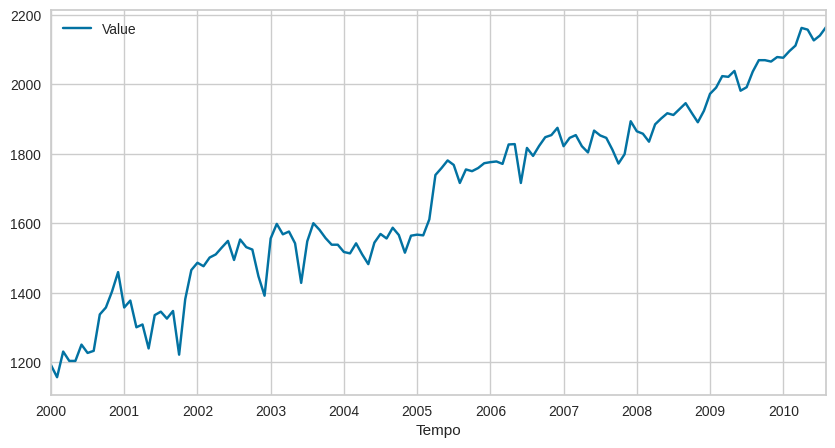

In [ ]:
# Plotar a série temporal (variável Value)
# O figsize determina apenas o tamanho do gráfico
dt.plot(figsize=(10,5))

In [ ]:
# Aqui é só um modo diferente de plotar a série temporal analisada
plot_model(plot = 'ts')

In [ ]:
# Aqui é modo de plotar a série com suas componentes decompostas (tendência, sazinalidade, aleatoriedade)
plot_model(plot = 'decomp', data_kwargs = {'type' : 'multiplicative'})

Iniciando o processo de previsão de demanda.

O pacote pycaret necessita da criação de um 'setup' para iniciar o treinamento da base de dados.

In [ ]:
# O parâmetro fh, em relação ao previsão, determina quantos pontos serão previstos para o futuro
# O fold determina o número de observações que serão analisadas na análise dos resíduos
# O seasonal_period especifica como serão esses dados (diários, mensais, ou anuais)
# Será gerado um pequeno relatório
setup(dt, fh=5, fold=10, seasonal_period='M')

,Description,Value
0,session_id,2770
1,Target,Value
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(128, 1)"
5,Transformed data shape,"(128, 1)"
6,Transformed train set shape,"(123, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Em alguns casos seu gerente tem um modelo de previsão de estimação.

Digamos que ele goste do ARIMA, por seu um modelo famoso.

Então ele pede para você fazer a previsão pelo modelo ARIMA, o que fazer?

In [ ]:
# Nesse caso vamos rodar o ARIMA
# O resultado é uma síntese dos parâmetros de análise dos erros do modelo, que pode ser comparado para uma análise mais profunda
# Veja que para a análise dos resíduos são 10 observações (fold=10)
arima = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2006-01,0.5677,0.6181,64.1835,85.8498,0.0365,0.0355,-3.2780
1,2006-06,0.4145,0.3569,47.0541,49.3987,0.0258,0.0262,-4.1378
2,2006-11,0.3282,0.3624,36.4202,48.9606,0.0199,0.0196,-4.8961
3,2007-04,0.5160,0.4977,55.5677,65.6001,0.0303,0.0303,-6.2958
4,2007-09,0.6100,0.5477,63.6979,70.6427,0.0351,0.0343,-1.4605
5,2008-02,0.2628,0.2494,26.4693,31.3466,0.0141,0.0141,-0.1149
6,2008-07,0.4454,0.4026,43.8199,49.5591,0.0228,0.0230,-6.6505
7,2008-12,0.8047,0.6747,79.1032,82.4724,0.0393,0.0402,-10.6836
8,2009-05,0.3631,0.3336,36.4532,41.1534,0.0180,0.0180,-0.2103
9,2009-10,0.1978,0.2267,19.9140,27.8288,0.0096,0.0097,-1.9649


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Por fim podemos fazer a previsão pelo ARIMA para os próximos 5 meses (fh=5)
arima.predict()

,Value
2010-04,2109.066367
2010-05,2125.447016
2010-06,2068.036153
2010-07,2077.763596
2010-08,2122.582787


In [ ]:
# Fazendo a plotagem da série temporal das próximas 50 observações
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 50})

In [ ]:
# Plotagem o Autorrelograma útil para ajustes profundos no ARIMA, por exemplo
plot_model(plot="acf")

In [ ]:
# Plotagem o autocorrelograma parcial
plot_model(plot="pacf")

Aqui vamos utilizar uma das principais funcionalidade do pycaret

Vamos utilizar o pycaret para escolher o melhor modelo de previsão

In [ ]:
# Contudo, a principal vantagem do uso do pacote é fazer uma previsão sem escolha dos modelos
# O pacote vai nos apresentar o melhor modelos
best_model = compare_models()
#best_model = compare_models(exclude='auto_arima')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.3071,0.2889,32.2935,37.3931,0.0171,0.0171,-1.2425,0.3640
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.3136,0.2928,33.1152,38.0634,0.0176,0.0177,-1.7767,0.2450
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.3137,0.2940,33.0030,38.0628,0.0175,0.0175,-1.3092,0.2160
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.3232,0.3003,34.0916,38.9791,0.0181,0.0181,-1.7190,0.3810
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.3282,0.3030,34.6209,39.3238,0.0184,0.0184,-1.7338,0.2150
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.3282,0.3030,34.6210,39.3239,0.0184,0.0184,-1.7338,0.2790
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.3282,0.3030,34.6235,39.3277,0.0184,0.0184,-1.7351,0.2170
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.3283,0.3031,34.6299,39.3353,0.0184,0.0184,-1.7377,0.3270
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.3283,0.3031,34.6298,39.3352,0.0184,0.0184,-1.7377,0.2180
polytrend,Polynomial Trend Forecaster,0.3445,0.3198,36.0831,41.2827,0.0192,0.0191,-1.5754,0.0400


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

Analisando os dados pelo melhor modelo

In [ ]:
# Podemos analisar os parâmetros de erro do melhor modelo selecionado
omp_cds_dt = create_model('omp_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2006-01,0.3368,0.3295,38.0828,45.7555,0.0213,0.0214,-0.2152
1,2006-06,0.4492,0.3826,50.9959,52.9533,0.0279,0.0283,-4.9038
2,2006-11,0.1626,0.1666,18.0467,22.5054,0.0098,0.0098,-0.2458
3,2007-04,0.3073,0.3021,33.0960,39.8094,0.0181,0.0179,-1.6868
4,2007-09,0.4457,0.4031,46.5417,51.9900,0.0256,0.0252,-0.3327
5,2008-02,0.1922,0.1916,19.3616,24.0818,0.0104,0.0103,0.3420
6,2008-07,0.2395,0.2597,23.5617,31.9699,0.0123,0.0122,-2.1836
7,2008-12,0.4488,0.3767,44.1151,46.0462,0.0219,0.0222,-2.6420
8,2009-05,0.3506,0.3191,35.2030,39.3613,0.0174,0.0174,-0.1072
9,2009-10,0.1384,0.1585,13.9303,19.4578,0.0066,0.0067,-0.4495


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Podemos verificar o comportamento da previsão x o comportamento real da série
# Também é possível extraploar o limite das 6 observações de teste para quantas desejar (no caso optamos pelos próximos 50 meses)
plot_model(omp_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 50})